# Our Goal
- Given historical data, build a machine learning model that could predict whether or not a borrower would default.

Note: The original dataset is from Kaggle, with some extra data being added for feature engineering.
Link to Kaggle notebook: https://www.kaggle.com/datasets/wordsforthewise/lending-club

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df = pd.read_csv('/content/lending_club_loan_two.csv')
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


# 1. EDA

<Axes: xlabel='loan_status', ylabel='count'>

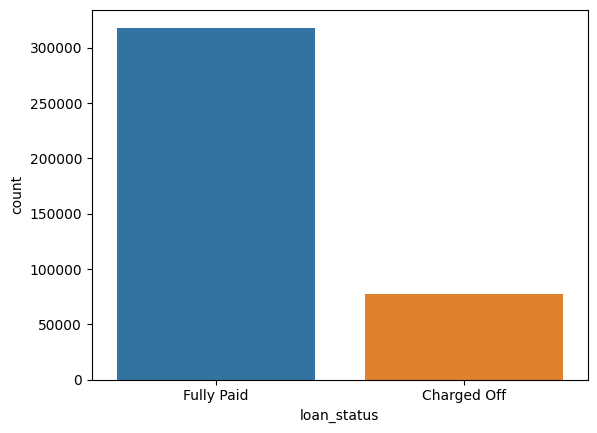

In [108]:
sns.countplot(x='loan_status', data=df)

In [109]:
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [110]:
# Convert the loan_status column values, from 'Fully Paid' and 'Charged Off' to 1 and 0 respectively
df['loan_status'] = df['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0})
df['term'] = df['term'].replace({' 36 months': 36, ' 60 months': 60})
df['initial_list_status'] = df['initial_list_status'].replace({'w': 0, 'f': 1})

In [111]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,0,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,1,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,1,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,1,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,1,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,0,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,1,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,1,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,1,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [112]:
df.corr()['loan_status'].sort_values()

<ipython-input-112-0d952b4e1d13>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_status'].sort_values()


int_rate               -0.247758
term                   -0.173246
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
initial_list_status     0.009489
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
loan_status             1.000000
Name: loan_status, dtype: float64

<Axes: xlabel='loan_status', ylabel='mort_acc'>

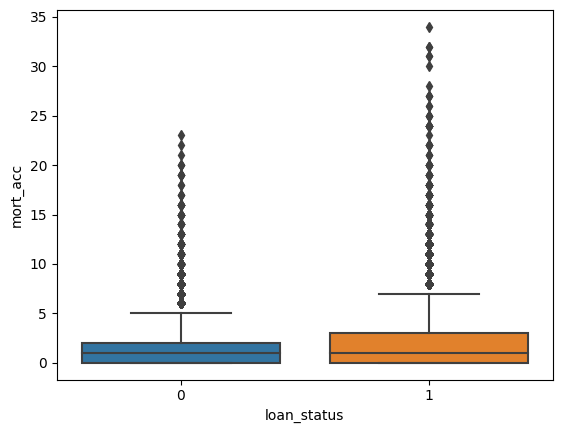

In [113]:
sns.boxplot(x=df['loan_status'], y=df['mort_acc'])

# People that has more accounts, more likely to pay off the loan

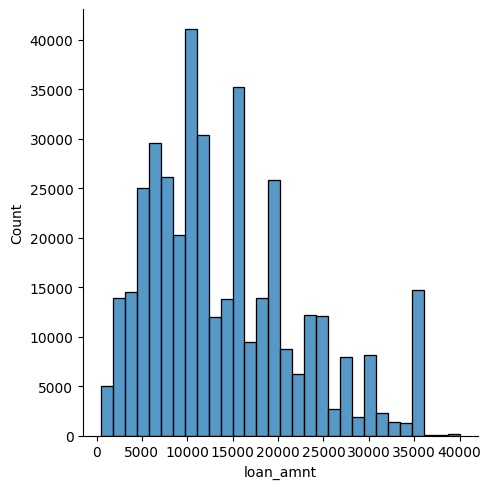

In [114]:
sns.displot(df['loan_amnt'], kde=False, bins=30)

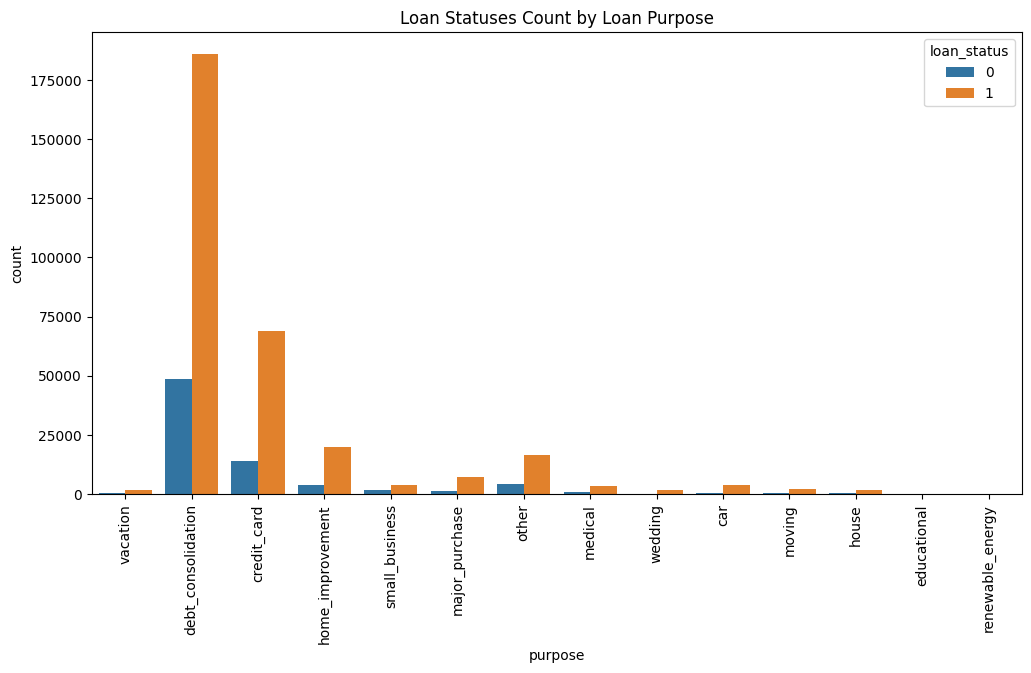

In [115]:
# See purpose and  loan_status
plt.figure(figsize=(12,6))
sns.countplot(x='purpose', data=df, hue='loan_status')
plt.xticks(rotation=90)
plt.title('Loan Statuses Count by Loan Purpose')
plt.show()

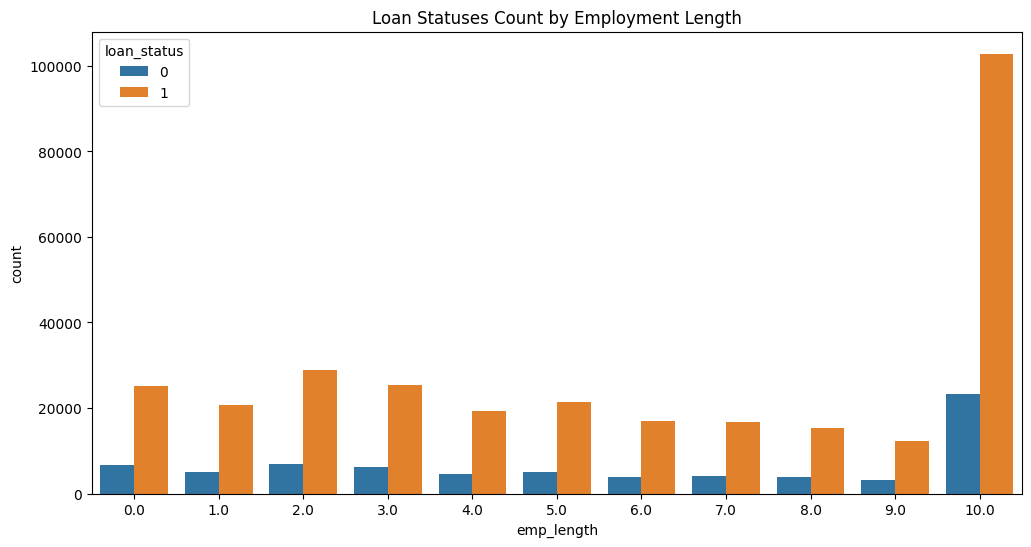

In [116]:
# Plot out the countplot with a hue separating Fully Paid vs Charged Off, with the x-axis is the emp_length
# Create a dictionary mapping to convert 'emp_length' from string to integer
emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

# Replace 'emp_length' strings with integers using the mapping
df['emp_length'] = df['emp_length'].replace(emp_length_mapping)

# Plot the countplot
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length', data=df, hue='loan_status')
plt.title('Loan Statuses Count by Employment Length')
plt.show()

# 2. Data Pre-processing

In [117]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [118]:
# Count how many different types of values for each column
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [119]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [120]:
df.corr()['pub_rec_bankruptcies'].sort_values()

<ipython-input-120-cd89280bad79>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['pub_rec_bankruptcies'].sort_values()


revol_bal              -0.124532
loan_amnt              -0.106539
installment            -0.098628
revol_util             -0.086751
annual_inc             -0.050162
initial_list_status    -0.040875
open_acc               -0.027732
term                   -0.019826
dti                    -0.014558
loan_status            -0.009383
mort_acc                0.027239
emp_length              0.038690
total_acc               0.042035
int_rate                0.057450
pub_rec                 0.699408
pub_rec_bankruptcies    1.000000
Name: pub_rec_bankruptcies, dtype: float64

In [121]:
# pub_rec seems to be highly correlated with bankrupcies, we can drop bankruptcies since it has many null values.
# dropping emp_title because there are too many missing values
# dropping title b/c too many missing values
# dropping revol_util b/c it's negatively correlated with loan_status
df = df.drop(['pub_rec_bankruptcies', 'emp_title', 'title', 'revol_util'], axis=1)

In [122]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length             18301
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
initial_list_status        0
application_type           0
mort_acc               37795
address                    0
dtype: int64

In [123]:
100* df.isnull().sum()/len(df)

loan_amnt              0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             4.621115
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
open_acc               0.000000
pub_rec                0.000000
revol_bal              0.000000
total_acc              0.000000
initial_list_status    0.000000
application_type       0.000000
mort_acc               9.543469
address                0.000000
dtype: float64

In [124]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [125]:
df.corr()['mort_acc'].sort_values()

<ipython-input-125-08a22ffe92b2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mort_acc'].sort_values()


int_rate              -0.082583
initial_list_status   -0.026847
dti                   -0.025439
pub_rec                0.011552
loan_status            0.073111
term                   0.096220
open_acc               0.109205
installment            0.193694
revol_bal              0.194925
emp_length             0.198494
loan_amnt              0.222315
annual_inc             0.236320
total_acc              0.381072
mort_acc               1.000000
Name: mort_acc, dtype: float64

In [126]:
# looks like total_acc is correlated with mort_acc.
# we're going to sort the df by 'total_acc'
# then create groups of 100 rows each
# calculate the average 'mort_acc' for each group
# iterates through the df to fill in 'mort_acc' missing values.

df = df.sort_values(by='total_acc')

# Create group of 100
grouped = [df[i:i+100] for i in range (0, len(df), 100)]

# calculate avg of 'mort_acc' for each group
group_averages = [group['mort_acc'].mean() for group in grouped]

# Iterate through the df and fill out
for i, group in enumerate(grouped):
  group_index = group.index
  average = group_averages[i]
  df.loc[group_index, 'mort_acc'] = df.loc[group_index, 'mort_acc'].fillna(average)


In [127]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length             18301
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
initial_list_status        0
application_type           0
mort_acc                   0
address                    0
dtype: int64

In [128]:
df.corr()['emp_length'].sort_values()

<ipython-input-128-9d17e6a43bf8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['emp_length'].sort_values()


initial_list_status   -0.030907
int_rate               0.012464
loan_status            0.013734
pub_rec                0.037494
dti                    0.041697
open_acc               0.043565
term                   0.060633
annual_inc             0.067569
revol_bal              0.087731
installment            0.088601
loan_amnt              0.100087
total_acc              0.117836
mort_acc               0.198050
emp_length             1.000000
Name: emp_length, dtype: float64

In [129]:
# do the same filling technique for emp_length

df = df.sort_values(by='total_acc')

# Create group of 100
grouped = [df[i:i+100] for i in range (0, len(df), 100)]

# calculate avg of 'emp_length' for each group
group_averages = [group['emp_length'].mean() for group in grouped]

# Iterate through the df and fill out
for i, group in enumerate(grouped):
  group_index = group.index
  average = group_averages[i]
  df.loc[group_index, 'emp_length'] = df.loc[group_index, 'emp_length'].fillna(average)


In [130]:
df.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
dtype: int64

In [131]:
df.corr()['loan_status'].sort_values()

<ipython-input-131-0d952b4e1d13>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_status'].sort_values()


int_rate              -0.247758
term                  -0.173246
dti                   -0.062413
loan_amnt             -0.059836
installment           -0.041082
open_acc              -0.028012
pub_rec               -0.019933
initial_list_status    0.009489
revol_bal              0.010892
emp_length             0.013871
total_acc              0.017893
annual_inc             0.053432
mort_acc               0.068816
loan_status            1.000000
Name: loan_status, dtype: float64

# 3. Create dummy variables for categorial variables

In [132]:
df.select_dtypes(['object']).columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'application_type',
       'address'],
      dtype='object')

In [133]:
# Since grade is part of sub_grade, we're droping grade feature

df = df.drop('grade',axis=1)

In [134]:
df

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,mort_acc,address
135808,10000.0,60,15.31,239.53,C4,10.0,RENT,72000.0,Source Verified,Mar-2014,...,0.28,Oct-2000,2.0,0.0,559.0,2.0,1,INDIVIDUAL,0.000000,"2941 Fuentes Lights Suite 606\nLyonstown, KY 1..."
199771,10000.0,36,7.89,312.86,A5,1.0,RENT,35000.0,Source Verified,Mar-2016,...,3.46,May-2012,2.0,0.0,2532.0,2.0,0,INDIVIDUAL,0.000000,"PSC 1788, Box 0543\nAPO AP 29597"
120249,9600.0,36,11.99,318.82,B3,3.0,RENT,90000.0,Verified,Jan-2014,...,3.53,Jul-2003,1.0,0.0,9063.0,2.0,1,INDIVIDUAL,0.000000,"2213 Nichols Crescent Suite 581\nHectorhaven, ..."
188372,2000.0,36,8.07,62.74,A4,0.0,RENT,30000.0,Not Verified,Jan-2008,...,3.68,Dec-2000,2.0,0.0,3953.0,2.0,1,INDIVIDUAL,0.033898,"731 Christopher Hills\nMorrisview, CT 30723"
36406,1700.0,36,23.10,65.90,E4,10.0,RENT,64000.0,Verified,Oct-2013,...,1.74,May-2006,1.0,0.0,4257.0,2.0,1,INDIVIDUAL,0.000000,"265 Todd Lake Apt. 850\nHernandezside, NV 05113"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96571,23200.0,60,17.86,587.37,D5,5.0,MORTGAGE,66000.0,Source Verified,Mar-2015,...,14.04,Sep-2001,43.0,0.0,25497.0,124.0,0,INDIVIDUAL,1.000000,USS Adams\nFPO AA 93700
82628,25000.0,60,7.89,505.60,A5,6.0,OWN,200000.0,Not Verified,Jul-2015,...,8.90,Jun-1993,48.0,0.0,27659.0,129.0,1,INDIVIDUAL,1.000000,Unit 3212 Box 9888\nDPO AE 05113
53317,24000.0,60,15.41,576.14,D1,0.0,MORTGAGE,82000.0,Not Verified,Nov-2015,...,33.85,Mar-2001,57.0,0.0,35715.0,135.0,0,INDIVIDUAL,3.000000,"03420 Kim Ville\nSydneyhaven, NV 00813"
123703,35000.0,36,8.67,1107.63,B1,10.0,MORTGAGE,189000.0,Verified,Dec-2014,...,6.63,Feb-1989,40.0,0.0,39065.0,150.0,1,INDIVIDUAL,2.000000,05796 Jennifer Estate Apt. 672\nLake Rachelbur...


In [135]:
# Convert all of these columns into dummy variables, and concat to og dataframe. Drop the original column.

dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose', 'sub_grade', 'home_ownership' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose', 'sub_grade', 'home_ownership'], axis=1)
df = pd.concat([df, dummies], axis=1)



In [136]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'earliest_cr_line', 'address'], dtype='object')

In [137]:
# Replace issue_d and earliest_cr_line with just the year

df['issue_d'] = df['issue_d'].apply(lambda issue_d:issue_d[-4:])
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda earliest_cr_line:earliest_cr_line[-4:])

# Replace address with just the zipcode
df['address'] = df['address'].apply(lambda address:address[-5:])

In [138]:
df

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
135808,10000.0,60,15.31,239.53,10.0,72000.0,2014,0,0.28,2000,...,0,0,0,0,0,0,0,0,0,1
199771,10000.0,36,7.89,312.86,1.0,35000.0,2016,1,3.46,2012,...,0,0,0,0,0,0,0,0,0,1
120249,9600.0,36,11.99,318.82,3.0,90000.0,2014,1,3.53,2003,...,0,0,0,0,0,0,0,0,0,1
188372,2000.0,36,8.07,62.74,0.0,30000.0,2008,1,3.68,2000,...,0,0,0,0,0,0,0,0,0,1
36406,1700.0,36,23.10,65.90,10.0,64000.0,2013,1,1.74,2006,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96571,23200.0,60,17.86,587.37,5.0,66000.0,2015,0,14.04,2001,...,0,0,0,0,0,1,0,0,0,0
82628,25000.0,60,7.89,505.60,6.0,200000.0,2015,1,8.90,1993,...,0,0,0,0,0,0,0,0,1,0
53317,24000.0,60,15.41,576.14,0.0,82000.0,2015,1,33.85,2001,...,0,0,0,0,0,1,0,0,0,0
123703,35000.0,36,8.67,1107.63,10.0,189000.0,2014,1,6.63,1989,...,0,0,0,0,0,1,0,0,0,0


In [140]:
df.corr()['loan_status'].sort_values()

<ipython-input-140-0d952b4e1d13>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_status'].sort_values()


int_rate                  -0.247758
term                      -0.173246
home_ownership_RENT       -0.063160
dti                       -0.062413
loan_amnt                 -0.059836
                             ...   
sub_grade_A5               0.062052
sub_grade_A4               0.064606
home_ownership_MORTGAGE    0.067024
mort_acc                   0.068816
loan_status                1.000000
Name: loan_status, Length: 70, dtype: float64

# 4. Train Test Split

In [141]:
from sklearn.model_selection import train_test_split

In [146]:
y = df['loan_status'].values
X = df.drop('loan_status', axis=1).values

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

# 5. Scaling the data

In [153]:
from sklearn.preprocessing import MinMaxScaler

In [154]:
scaler = MinMaxScaler()

In [155]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Creating the model

In [158]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping

In [159]:
X_train.shape

(316824, 72)

In [168]:
model = Sequential()

# input layer
model.add(Dense(78, activation='relu'))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam')

In [169]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [170]:
model.fit(x=X_train, y=y_train, epochs=600, batch_size = 256, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/600
1238/1238 [==============================] - 6s 4ms/step - loss: 0.4244 - val_loss: 0.3601
Epoch 2/600
1238/1238 [==============================] - 4s 3ms/step - loss: 0.3713 - val_loss: 0.3354
Epoch 3/600
1238/1238 [==============================] - 4s 3ms/step - loss: 0.3473 - val_loss: 0.3211
Epoch 4/600
1238/1238 [==============================] - 5s 4ms/step - loss: 0.3304 - val_loss: 0.3018
Epoch 5/600
1238/1238 [==============================] - 4s 3ms/step - loss: 0.3164 - val_loss: 0.2903
Epoch 6/600
1238/1238 [==============================] - 4s 3ms/step - loss: 0.3124 - val_loss: 0.2904
Epoch 7/600
1238/1238 [==============================] - 5s 4ms/step - loss: 0.3114 - val_loss: 0.2892
Epoch 8/600
1238/1238 [==============================] - 4s 3ms/step - loss: 0.3082 - val_loss: 0.2828
Epoch 9/600
1238/1238 [==============================] - 4s 3ms/step - loss: 0.3061 - val_loss: 0.2818
Epoch 10/600
1238/1238 [==============================] - 5s 4ms/step - l

<Axes: >

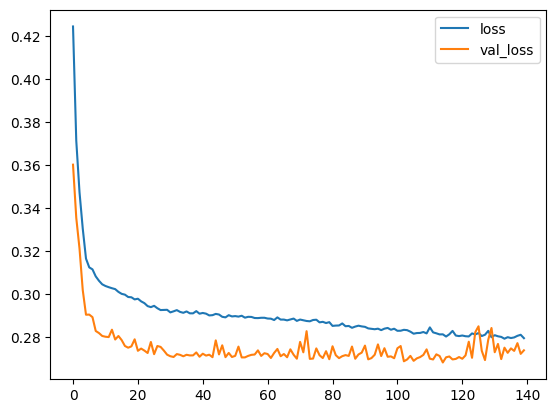

In [171]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [172]:
from sklearn.metrics import classification_report, confusion_matrix

pred = model.predict(X_test)

pred = (pred > 0.5).astype(int)

print(classification_report(y_test, pred))

2476/2476 [==============================] - 4s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15344
           1       0.88      1.00      0.94     63862

    accuracy                           0.89     79206
   macro avg       0.94      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



In [167]:
print(confusion_matrix(y_test, pred))

[[ 6917  8427]
 [  214 63648]]
